<a href="https://colab.research.google.com/github/Mark-yank/TCC/blob/main/Codigo_TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EXPLICAÇÃO
Esse notebook está sendo utilizado para treinar um modelo de regressão logistica e que tem um dataset com o foco em classificação a ocorrencia de um paciente sofrer de ataque cardiaco.
Temos 13 colunas e informações e 1 coluna de resultado das informações de 303 pacientes
Essas são as informações que temos disponiveis:
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6.fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. target: 0= less chance of heart attack 1= more chance of heart attack

#CONFORMAL PREDICTION(CP)
Conformal Prediction é uma técnica que transforma qualquer modelo de previsão em um modelo que fornece intervalos de confiança para cada predição, garantindo uma cobertura probabilística. Em outras palavras, o meu modelo não retornará um valor previsto, mas um intervalo de possiveis respostas com uma probabilidade minima pré definida.



#DEFINIÇÃO DO DATA SET E OS MODELOS

In [ ]:
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report,f1_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the URL
data = pd.read_csv("https://raw.githubusercontent.com/Mark-yank/TCC/main/heart%20(1).csv")

y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)
x_test, x_calib, y_test, y_calib = train_test_split(X_test, y_test, test_size=0.50, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)
x_calib = scaler.transform(x_calib)

In [ ]:
print(len(X_train))
print(len(x_test))
print(len(x_calib))

212
45
46


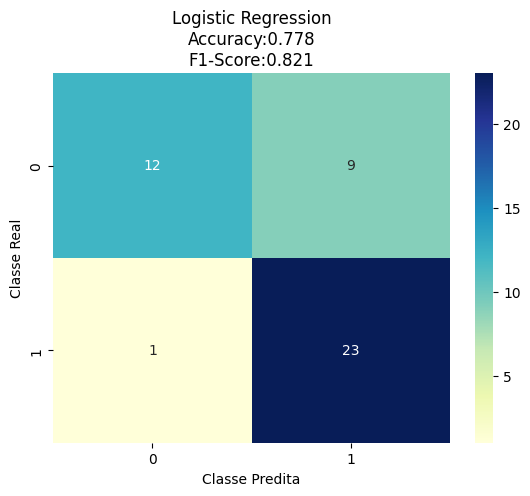



              precision    recall  f1-score   support

           0       0.92      0.57      0.71        21
           1       0.72      0.96      0.82        24

    accuracy                           0.78        45
   macro avg       0.82      0.76      0.76        45
weighted avg       0.81      0.78      0.77        45



In [ ]:
#Modelo de Regressão Logistica
m1 = 'Logistic Regression'
rl = LogisticRegression()
rl_model = rl.fit(X_train, y_train)

rl_predict = rl.predict(x_test)

rl_conf_matrix = confusion_matrix(y_test, rl_predict)
rl_acc_score = accuracy_score(y_test, rl_predict)
rl_f1_score = f1_score(y_test, rl_predict)
rl_recall = recall_score(y_test, rl_predict)
rl_precision = precision_score(y_test, rl_predict)

#Resultados
sns.heatmap(rl_conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title(m1 + '\nAccuracy:{0:.3f}'.format(rl_acc_score)+ '\nF1-Score:{0:.3f}'.format(rl_f1_score))
sns.set(font_scale=1.4)
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.show()
print("\n")
print(classification_report(y_test,rl_predict))

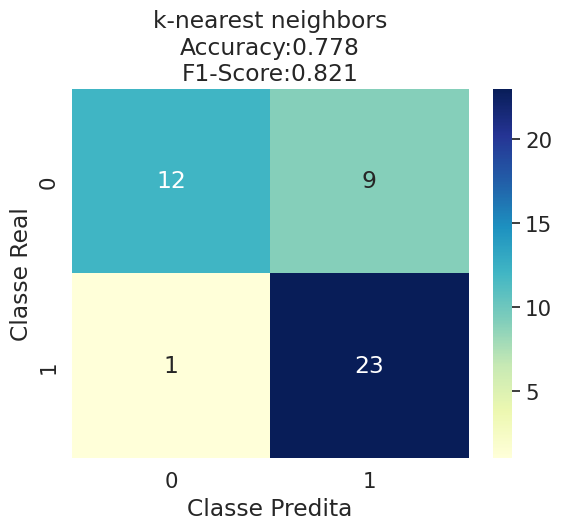


--- Avaliação do Baseline (k-NN) ---
              precision    recall  f1-score   support

           0       0.92      0.57      0.71        21
           1       0.72      0.96      0.82        24

    accuracy                           0.78        45
   macro avg       0.82      0.76      0.76        45
weighted avg       0.81      0.78      0.77        45



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Modelo usando k=5 vizinhos
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(x_test)
knn_conf_matrix = confusion_matrix(y_test, knn_preds)
knn_acc_score = accuracy_score(y_test, knn_preds)
knn_f1_score = f1_score(y_test, knn_preds)
knn_recall = recall_score(y_test, knn_preds)
knn_precision = precision_score(y_test, knn_preds)

# Resultados
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("k-nearest neighbors" + '\nAccuracy:{0:.3f}'.format(knn_acc_score) + '\nF1-Score:{0:.3f}'.format(knn_f1_score))
sns.set(font_scale=1.4)
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.show()
print("\n--- Avaliação do Baseline (k-NN) ---")
print(classification_report(y_test, knn_preds))

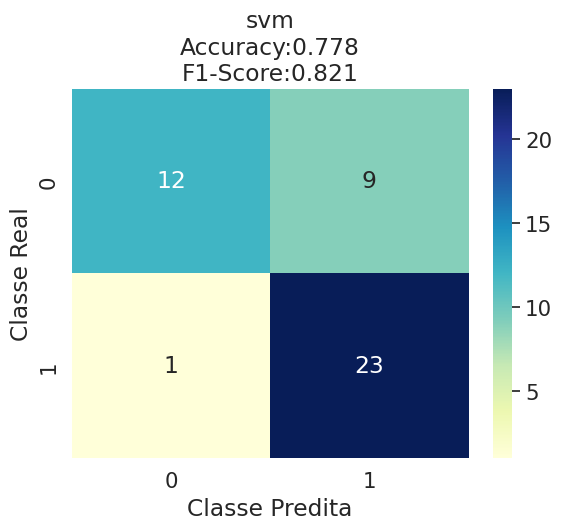


--- Avaliação do Baseline (SVM) ---
              precision    recall  f1-score   support

           0       0.92      0.57      0.71        21
           1       0.72      0.96      0.82        24

    accuracy                           0.78        45
   macro avg       0.82      0.76      0.76        45
weighted avg       0.81      0.78      0.77        45



In [ ]:
from sklearn.svm import SVC

# Cria e treina o modelo SVM
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

svm_preds = svm_model.predict(x_test)

svm_conf_matrix = confusion_matrix(y_test, svm_preds)
svm_acc_score = accuracy_score(y_test, svm_preds)
svm_f1_score = f1_score(y_test, svm_preds)
svm_recall = recall_score(y_test, svm_preds)
svm_precision = precision_score(y_test, svm_preds)
# Resultados
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("svm" + '\nAccuracy:{0:.3f}'.format(svm_acc_score) + '\nF1-Score:{0:.3f}'.format(svm_f1_score))
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
sns.set(font_scale=1.4)
plt.show()
print("\n--- Avaliação do Baseline (SVM) ---")
print(classification_report(y_test, svm_preds))

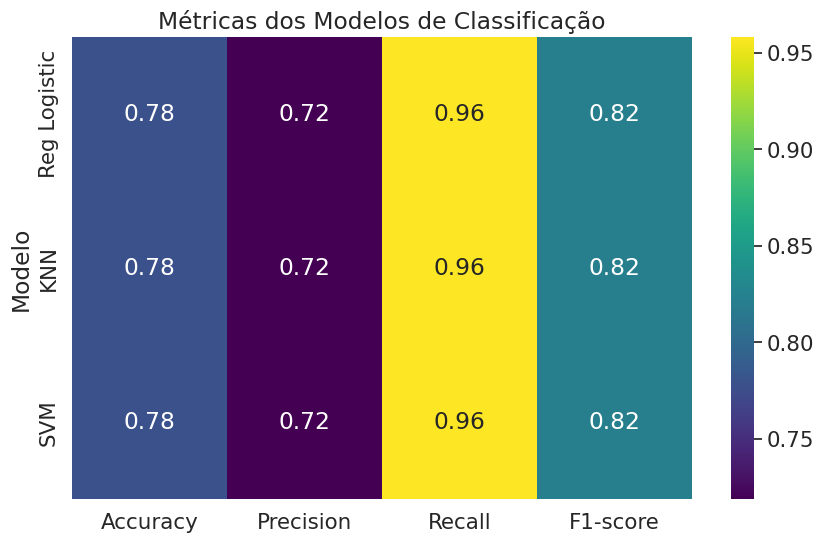

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Exemplo: resultados dos modelos
data = {
    "Modelo": ["Reg Logistic", "KNN", "SVM"],
    "Accuracy": [rl_acc_score, knn_acc_score, svm_acc_score],
    "Precision": [rl_precision, knn_precision, svm_precision],
    "Recall": [rl_recall,knn_recall,svm_recall],
    "F1-score": [rl_f1_score,knn_f1_score,svm_f1_score]
}

df = pd.DataFrame(data)
df = df.set_index("Modelo")

plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, fmt=".2f", cmap="viridis")
plt.title("Métricas dos Modelos de Classificação")
plt.show()


#CP PARA REGRESSÃO LOGISTICA

In [ ]:
# Probabilidades
probs_calib_RL = rl_model.predict_proba(x_calib)
probs_test_RL = rl_model.predict_proba(x_test)

# Nonconformity scores: 1 - prob da classe correta
scores_calib_RL = 1 - probs_calib_RL[np.arange(len(y_calib)), y_calib]

# Definir nível de confiança
alpha = 0.1
# 90% de confiança
qhat = np.quantile(scores_calib_RL, 1 - alpha)

# Construir conjuntos de predição para teste
prediction_sets_RL = []
for p in probs_test_RL:
  labels = np.where(1 - p <= qhat)[0] # incluir classes que "passam"
  prediction_sets_RL.append(labels)


In [ ]:
# ============================
# MÉTRICAS DE CP
# ============================

# ---------------------------
# 1. Cobertura tradicional
# ---------------------------
coverage_rl = np.mean([
    y_test.iloc[i] in prediction_sets_RL[i]
    for i in range(len(y_test))
])

# ---------------------------
# 2. Tamanho médio do conjunto
# ---------------------------
avg_size_rl = np.mean([len(s) for s in prediction_sets_RL])

# ---------------------------
# 3. Ambiguidade
#    (conjuntos com mais de 1 classe)
# ---------------------------
ambiguity_rate_rl = np.mean([
    len(s) > 1 for s in prediction_sets_RL
])

# ---------------------------
# 4. Taxa de singletons
#    (apenas 1 classe no conjunto)
# ---------------------------
singleton_rate_rl = np.mean([
    len(s) == 1 for s in prediction_sets_RL
])

# ---------------------------
# 5. Conjuntos vazios (raríssimo)
# ---------------------------
empty_rate_rl = np.mean([
    len(s) == 0 for s in prediction_sets_RL
])

# ---------------------------
# 6. Distribuição dos tamanhos
# ---------------------------
sizes_rl = [len(s) for s in prediction_sets_RL]
size_counts_rl = {
    "tamanho_1": np.mean([s == 1 for s in sizes_rl]),
    "tamanho_2": np.mean([s == 2 for s in sizes_rl]),
    # em binário só pode 1 ou 2
}

# ---------------------------
# 6. Quantidade de elementos por classe
# ---------------------------
conj_zero_rl = 0
conj_um_rl = 0
for i in range(len(x_test)):
  if (prediction_sets_RL[i] == [0]).all():
    conj_zero_rl += 1
  elif (prediction_sets_RL[i] == [1]).all():
    conj_um_rl += 1
  else:
    conj_zero_rl += 1
    conj_um_rl += 1

# ============================
# EXIBIR RESULTADOS
# ============================

print("\n==============================")
print(" MÉTRICAS DE CONFORMAL PREDICTION DA RL")
print("==============================")
print(f"Cobertura (CP): {coverage_rl:.3f}")
print(f"Tamanho médio do conjunto: {avg_size_rl:.3f}")
print(f"Ambiguidade: {ambiguity_rate_rl:.3f}")
print(f"Singletons: {singleton_rate_rl:.3f}")
print(f"Conjuntos vazios: {empty_rate_rl:.3f}")
print(f"amostras no conjunto 0: {conj_zero_rl}")
print(f"amostras no conjunto 1: {conj_um_rl}")



 MÉTRICAS DE CONFORMAL PREDICTION DA RL
Cobertura (CP): 0.911
Tamanho médio do conjunto: 1.267
Ambiguidade: 0.267
Singletons: 0.733
Conjuntos vazios: 0.000
amostras no conjunto 0: 24
amostras no conjunto 1: 33


In [ ]:
# ============================
# ✨ Mostrar conjuntos CP para cada amostra do teste
# ============================
classes = rl_model.classes_  # nomes das classes

rows = []
for i in range(len(x_test)):
    row = {
        "index": i,
        "y_true": y_test.iloc[i],
        "pred_point": rl_predict[i],
        "proba_class_0": probs_test_RL[i][0],
        "proba_class_1": probs_test_RL[i][1],
        "prediction_set": list(classes[prediction_sets_RL[i]])
    }
    rows.append(row)

df_results = pd.DataFrame(rows)

print("\n--- Conjuntos de categorização das 20 primeiras amostra (modelo RL)---")
print(df_results.head(20))  # imprime as 20 primeiras, ajuste se quiser


--- Conjuntos de categorização das 20 primeiras amostra (modelo RL)---
    index  y_true  pred_point  proba_class_0  proba_class_1 prediction_set
0       0       0           0       0.980416       0.019584            [0]
1       1       0           0       0.960306       0.039694            [0]
2       2       1           1       0.072313       0.927687            [1]
3       3       1           1       0.015454       0.984546            [1]
4       4       1           1       0.139289       0.860711            [1]
5       5       1           1       0.045389       0.954611            [1]
6       6       0           1       0.248135       0.751865            [1]
7       7       0           0       0.835164       0.164836            [0]
8       8       1           1       0.022070       0.977930            [1]
9       9       1           1       0.244542       0.755458            [1]
10     10       0           0       0.985278       0.014722            [0]
11     11       1           

#CP PARA KNN

In [ ]:
# Probabilidades
probs_calib_knn = knn_model.predict_proba(x_calib)
probs_test_knn = knn_model.predict_proba(x_test)

# Nonconformity scores: 1 - prob da classe correta
scores_calib_knn = 1 - probs_calib_knn[np.arange(len(y_calib)), y_calib]

# Definir nível de confiança
alpha = 0.1  # 90% de confiança
qhat = np.quantile(scores_calib_knn, 1 - alpha) # não seria scores_calib_knn???

# Construir conjuntos de predição para teste
prediction_sets_knn = []
for p in probs_test_knn:
    labels = np.where(1 - p <= qhat)[0]  # incluir classes que "passam"
    prediction_sets_knn.append(labels)


In [ ]:
# ============================
# MÉTRICAS DE CP
# ============================

# ---------------------------
# 1. Cobertura tradicional
# ---------------------------
coverage_knn = np.mean([
    y_test.iloc[i] in prediction_sets_knn[i]
    for i in range(len(y_test))
])

# ---------------------------
# 2. Tamanho médio do conjunto
# ---------------------------
avg_size_knn = np.mean([len(s) for s in prediction_sets_knn])

# ---------------------------
# 3. Ambiguidade
#    (conjuntos com mais de 1 classe)
# ---------------------------
ambiguity_rate_knn = np.mean([
    len(s) > 1 for s in prediction_sets_knn
])

# ---------------------------
# 4. Taxa de singletons
#    (apenas 1 classe no conjunto)
# ---------------------------
singleton_rate_knn = np.mean([
    len(s) == 1 for s in prediction_sets_knn
])

# ---------------------------
# 5. Conjuntos vazios (raríssimo)
# ---------------------------
empty_rate_knn = np.mean([
    len(s) == 0 for s in prediction_sets_knn
])

# ---------------------------
# 6. Distribuição dos tamanhos
# ---------------------------
sizes_knn = [len(s) for s in prediction_sets_knn]
size_counts_knn = {
    "tamanho_1": np.mean([s == 1 for s in sizes_knn]),
    "tamanho_2": np.mean([s == 2 for s in sizes_knn]),
    # em binário só pode 1 ou 2
}

# ---------------------------
# 6. Quantidade de elementos por classe
# ---------------------------
conj_zero_knn = 0
conj_um_knn = 0
for i in range(len(x_test)):
  if (prediction_sets_knn[i] == [0]).all():
    conj_zero_knn += 1
  elif (prediction_sets_knn[i] == [1]).all():
    conj_um_knn += 1
  else:
    conj_zero_knn += 1
    conj_um_knn += 1

# ============================
# EXIBIR RESULTADOS
# ============================

print("\n==============================")
print(" MÉTRICAS DE CONFORMAL PREDICTION DO KNN")
print("==============================")
print(f"Cobertura (CP): {coverage_knn:.3f}")
print(f"Tamanho médio do conjunto: {avg_size_knn:.3f}")
print(f"Ambiguidade: {ambiguity_rate_knn:.3f}")
print(f"Singletons: {singleton_rate_knn:.3f}")
print(f"Conjuntos vazios: {empty_rate_knn:.3f}")
print(f"amostras no conjunto 0: {conj_zero_knn}")
print(f"amostras no conjunto 1: {conj_um_knn}")



 MÉTRICAS DE CONFORMAL PREDICTION DO KNN
Cobertura (CP): 0.911
Tamanho médio do conjunto: 1.289
Ambiguidade: 0.289
Singletons: 0.711
Conjuntos vazios: 0.000
amostras no conjunto 0: 21
amostras no conjunto 1: 37


In [ ]:
# ============================
# ✨ Mostrar conjuntos CP para cada amostra do teste
# ============================
classes_knn = knn_model.classes_  # nomes das classes

rows = []
for i in range(len(x_test)):
    row = {
        "index": i,
        "y_true": y_test.iloc[i],
        "pred_point": knn_preds[i],
        "proba_class_0": probs_test_knn[i][0],
        "proba_class_1": probs_test_knn[i][1],
        "prediction_set": list(classes_knn[prediction_sets_knn[i]])
    }
    rows.append(row)

df_results = pd.DataFrame(rows)

print("\n--- Conjuntos de categorização das 20 primeiras amostra (modelo KNN) ---")
print(df_results.head(20))  # imprime as 20 primeiras, ajuste se quiser



--- Conjuntos de categorização das 20 primeiras amostra (modelo KNN) ---
    index  y_true  pred_point  proba_class_0  proba_class_1 prediction_set
0       0       0           0            1.0            0.0            [0]
1       1       0           0            1.0            0.0            [0]
2       2       1           1            0.0            1.0            [1]
3       3       1           1            0.0            1.0            [1]
4       4       1           1            0.0            1.0            [1]
5       5       1           1            0.0            1.0            [1]
6       6       0           0            0.6            0.4         [0, 1]
7       7       0           0            0.8            0.2            [0]
8       8       1           1            0.0            1.0            [1]
9       9       1           1            0.2            0.8            [1]
10     10       0           0            1.0            0.0            [0]
11     11       1         

#CP DO SVM

In [ ]:
probs_calib_svm = svm_model.predict_proba(x_calib)
probs_test_svm = svm_model.predict_proba(x_test)

# Nonconformity scores: 1 - prob da classe correta
scores_calib_svm = 1 - probs_calib_svm[np.arange(len(y_calib)), y_calib]

# Definir nível de confiança
alpha = 0.1  # 90% de confiança
qhat = np.quantile(scores_calib_svm, 1 - alpha)

# Construir conjuntos de predição para teste
prediction_sets_svm = []
for p in probs_test_svm:
    labels = np.where(1 - p <= qhat)[0]  # incluir classes que "passam"
    prediction_sets_svm.append(labels)


In [ ]:
# ============================
# MÉTRICAS DE CP
# ============================

# ---------------------------
# 1. Cobertura tradicional
# ---------------------------
coverage_svm = np.mean([
    y_test.iloc[i] in prediction_sets_svm[i]
    for i in range(len(y_test))
])

# ---------------------------
# 2. Tamanho médio do conjunto
# ---------------------------
avg_size_svm = np.mean([len(s) for s in prediction_sets_svm])

# ---------------------------
# 3. Ambiguidade
#    (conjuntos com mais de 1 classe)
# ---------------------------
ambiguity_rate_svm = np.mean([
    len(s) > 1 for s in prediction_sets_svm
])

# ---------------------------
# 4. Taxa de singletons
#    (apenas 1 classe no conjunto)
# ---------------------------
singleton_rate_svm = np.mean([
    len(s) == 1 for s in prediction_sets_svm
])

# ---------------------------
# 5. Conjuntos vazios (raríssimo)
# ---------------------------
empty_rate_svm = np.mean([
    len(s) == 0 for s in prediction_sets_svm
])

# ---------------------------
# 6. Distribuição dos tamanhos
# ---------------------------
sizes_svm = [len(s) for s in prediction_sets_svm]
size_counts_svm = {
    "tamanho_1": np.mean([s == 1 for s in sizes_svm]),
    "tamanho_2": np.mean([s == 2 for s in sizes_svm]),
    # em binário só pode 1 ou 2
}

# ---------------------------
# 6. Quantidade de elementos por classe
# ---------------------------
conj_zero_svm = 0
conj_um_svm = 0
for i in range(len(x_test)):
  if (prediction_sets_svm[i] == [0]).all():
    conj_zero_svm += 1
  elif (prediction_sets_svm[i] == [1]).all():
    conj_um_svm += 1
  else:
    conj_zero_svm += 1
    conj_um_svm += 1

# ============================
# EXIBIR RESULTADOS
# ============================

print("\n==============================")
print(" MÉTRICAS DE CONFORMAL PREDICTION DO SVM")
print("==============================")
print(f"Cobertura (CP): {coverage_svm:.3f}")
print(f"Tamanho médio do conjunto: {avg_size_svm:.3f}")
print(f"Ambiguidade: {ambiguity_rate_svm:.3f}")
print(f"Singletons: {singleton_rate_svm:.3f}")
print(f"Conjuntos vazios: {empty_rate_svm:.3f}")
print(f"amostras no conjunto 0: {conj_zero_svm}")
print(f"amostras no conjunto 1: {conj_um_svm}")



 MÉTRICAS DE CONFORMAL PREDICTION DO SVM
Cobertura (CP): 0.889
Tamanho médio do conjunto: 1.178
Ambiguidade: 0.178
Singletons: 0.822
Conjuntos vazios: 0.000
amostras no conjunto 0: 19
amostras no conjunto 1: 34


In [ ]:
# ============================
# ✨ Mostrar conjuntos CP para cada amostra do teste
# ============================
svm_classes = svm_model.classes_  # nomes das classes

rows = []
for i in range(len(x_test)):
    row = {
        "index": i,
        "y_true": y_test.iloc[i],
        "pred_point": svm_preds[i],
        "proba_class_0": probs_test_svm[i][0],
        "proba_class_1": probs_test_svm[i][1],
        "prediction_set": list(svm_classes[prediction_sets_svm[i]])
    }
    rows.append(row)

df_results = pd.DataFrame(rows)

print("\n--- Conjuntos de categorização das 20 primeiras amostra (modelo SVM) ---")
print(df_results.head(20))  # imprime as 20 primeiras, ajuste se quiser



--- Conjuntos de categorização das 20 primeiras amostra (modelo SVM) ---
    index  y_true  pred_point  proba_class_0  proba_class_1 prediction_set
0       0       0           0       0.827669       0.172331            [0]
1       1       0           0       0.881912       0.118088            [0]
2       2       1           1       0.111776       0.888224            [1]
3       3       1           1       0.083395       0.916605            [1]
4       4       1           1       0.071761       0.928239            [1]
5       5       1           1       0.047431       0.952569            [1]
6       6       0           0       0.572746       0.427254         [0, 1]
7       7       0           0       0.712589       0.287411            [0]
8       8       1           1       0.054397       0.945603            [1]
9       9       1           1       0.234907       0.765093            [1]
10     10       0           0       0.918678       0.081322            [0]
11     11       1         

#Graficos Comparativos

In [ ]:
# ============================
# Variação com diferentes alphas
# ============================
alphas = np.linspace(0.01, 0.5, 20)  # de 99% a 50% confiança
coverages_regressao = []
avg_sizes_regressao = []

coverages_kvizinhos = []
avg_sizes_kvizinhos = []

coverages_suport = []
avg_sizes_suport = []

for a in alphas:
    qhat_RL = np.quantile(scores_calib_RL, 1 - a)
    prediction_sets_regressao = []
    for p in probs_test_RL:
        scores = 1 - p
        labels = np.where(scores <= qhat_RL)[0]
        prediction_sets_regressao.append(labels)
    coverages_regressao.append(np.mean([y_test.iloc[i] in prediction_sets_regressao[i] for i in range(len(y_test))]))
    avg_sizes_regressao.append(np.mean([len(s) for s in prediction_sets_regressao]))
for a in alphas:
    qhat_knn = np.quantile(scores_calib_knn, 1 - a)
    prediction_sets_kvizinhos = []
    for p in probs_test_knn:
        scores = 1 - p
        labels = np.where(scores <= qhat_knn)[0]
        prediction_sets_kvizinhos.append(labels)
    coverages_kvizinhos.append(np.mean([y_test.iloc[i] in prediction_sets_kvizinhos[i] for i in range(len(y_test))]))
    avg_sizes_kvizinhos.append(np.mean([len(s) for s in prediction_sets_kvizinhos]))

for a in alphas:
    qhat_svm = np.quantile(scores_calib_svm, 1 - a)
    prediction_sets_suport = []
    for p in probs_test_svm:
        scores = 1 - p
        labels = np.where(scores <= qhat_svm)[0]
        prediction_sets_suport.append(labels)
    coverages_suport.append(np.mean([y_test.iloc[i] in prediction_sets_suport[i] for i in range(len(y_test))]))
    avg_sizes_suport.append(np.mean([len(s) for s in prediction_sets_suport]))

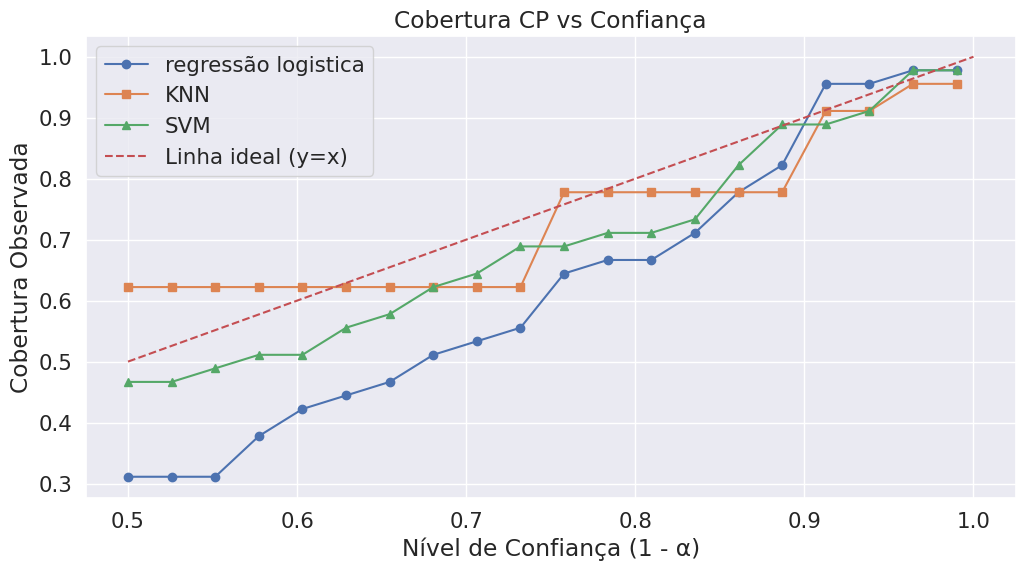

In [ ]:
# ============================
# Plot 1: Cobertura vs Nível de Confiança
# ============================
plt.figure(figsize=(12,6))

plt.plot(1-alphas, coverages_regressao, marker='o', label="regressão logistica")
plt.plot(1-alphas, coverages_kvizinhos, marker='s', label="KNN")
plt.plot(1-alphas, coverages_suport, marker='^', label="SVM")
plt.plot([0.5,1], [0.5,1], 'r--', label="Linha ideal (y=x)")
plt.xlabel("Nível de Confiança (1 - α)")
plt.ylabel("Cobertura Observada")
plt.title("Cobertura CP vs Confiança")
plt.legend()


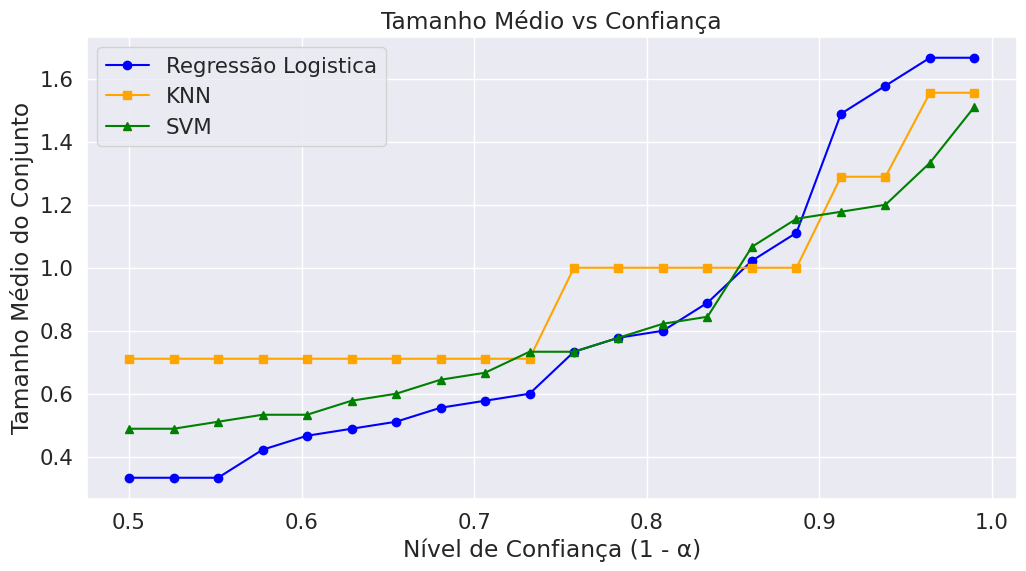

In [ ]:
# ============================
# Plot 2: Tamanho médio dos conjuntos
# ============================
plt.figure(figsize=(12,6))
plt.plot(1-alphas, avg_sizes_regressao, marker='o', color="blue", label ="Regressão Logistica")
plt.plot(1-alphas, avg_sizes_kvizinhos, marker='s', color="orange", label ="KNN")
plt.plot(1-alphas, avg_sizes_suport, marker='^', color="green", label ="SVM")
plt.xlabel("Nível de Confiança (1 - α)")
plt.ylabel("Tamanho Médio do Conjunto")
plt.title("Tamanho Médio vs Confiança")
plt.legend()

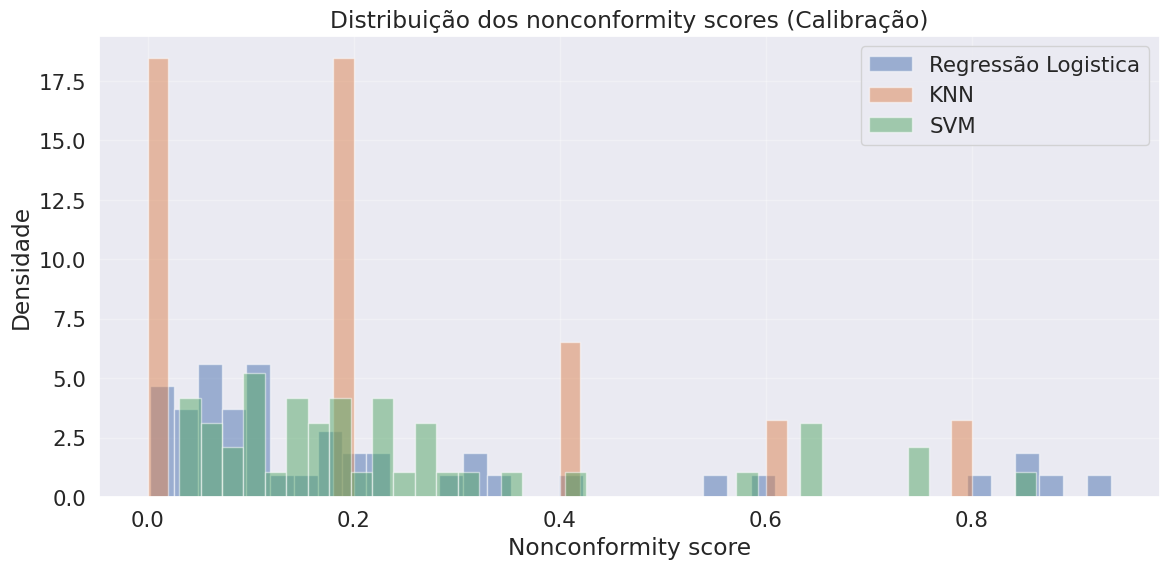

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,6))

bins = 40  # número de barras do histograma

plt.hist(scores_calib_RL, bins=bins, alpha=0.5, density=True, label="Regressão Logistica")
plt.hist(scores_calib_knn, bins=bins, alpha=0.5, density=True, label="KNN")
plt.hist(scores_calib_svm, bins=bins, alpha=0.5, density=True, label="SVM")

plt.xlabel("Nonconformity score")
plt.ylabel("Densidade")
plt.title("Distribuição dos nonconformity scores (Calibração)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
